# Problem Statement

FireForests
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import Adam 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [5]:
df.shape

(517, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

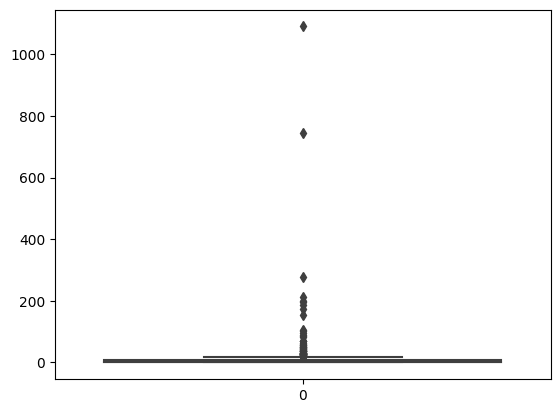

In [10]:
ax = sns.boxplot(df['area'])  #to check outliers

# Feature Analysis

In [11]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
df.size_category.value_counts() 

small    378
large    139
Name: size_category, dtype: int64

# Label Encoding

In [13]:
from sklearn import preprocessing      #We are going to perform label encoding since it is faster than dummy variables
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = pd.DataFrame(y)
label_encoder_y = LabelEncoder()
y = y.apply(LabelEncoder().fit_transform)
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [17]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=30,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history= model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 8ms/step - loss: 0.5965 - accuracy: 0.7486 - val_loss: 0.5631 - val_accuracy: 0.6901
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8555 - val_loss: 0.3150 - val_accuracy: 0.8596
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9595 - val_loss: 0.1715 - val_accuracy: 0.9357
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9798 - val_loss: 0.1529 - val_accuracy: 0.9357
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.9624 - val_loss: 0.1268 - val_accuracy: 0.9415
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.9682 - val_loss: 0.1489 - val_accuracy: 0.9415
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9798 - val_loss: 0.1373 - val_accuracy: 0.9532
Epoch 8/150
3

In [20]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9729
accuracy: 97.29%


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

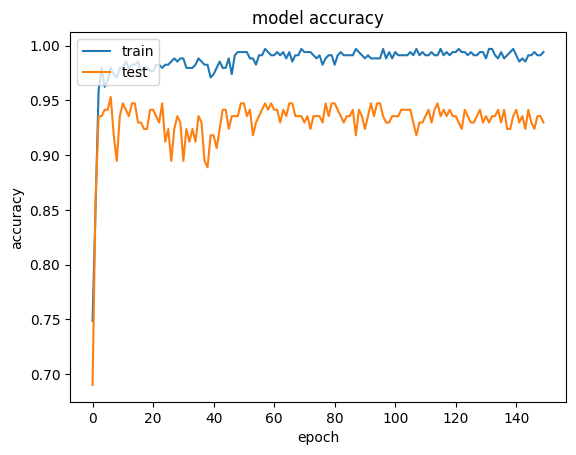

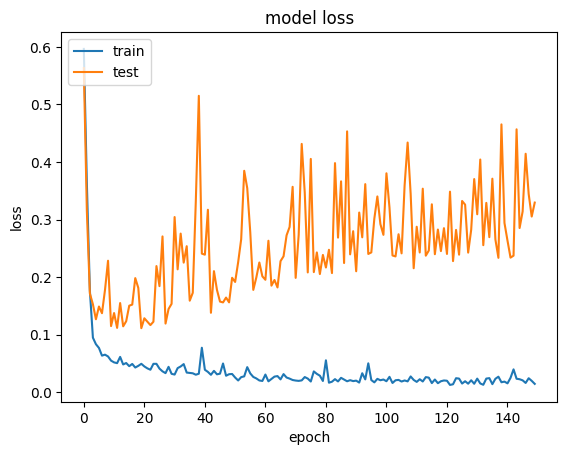

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [24]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-4.810251e-17,1.374357e-16,1.374357e-17,-7.902555e-17,-5.497429e-17,-1.374357e-17,6.871787e-18,-1.374357e-17,...,-6.871787e-17,2.061536e-17,2.233331e-17,-1.374357e-17,-1.374357e-17,-8.246144e-17,-1.717947e-17,-1.030768e-17,5.497429e-17,2.748715e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-2.755520e+00,-2.134531e+00,-2.119754e+00,-2.133725e+00,-2.036890e+00,-1.713964e+00,-2.004018e+00,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-1.089076,-9.031536e-01,-5.025653e-01,-8.010724e-01,-7.605602e-01,-6.928003e-01,-7.181571e-01,-7.060079e-01,-7.499909e-01,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,0.055339,1.367805e-01,1.039993e-01,1.234588e-01,1.959092e-01,-4.438437e-02,4.755898e-02,-1.390326e-01,2.425585e-03,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,1.199754,6.567476e-01,6.672378e-01,8.168572e-01,7.999952e-01,6.400547e-01,7.494654e-01,5.539372e-01,5.040366e-01,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.199754,1.696682e+00,1.793715e+00,1.670271e+00,1.538322e+00,2.117002e+00,2.025659e+00,2.947833e+00,3.012092e+00,1.354679e+01,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [25]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   2.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.942 total time=   1.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.981 total time=   1.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.942 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.951 total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.903 total time=   1.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.893 total time=   1.3s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   2.0s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.962 total time=   1.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.971 total time=   2.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.942 total time=   1.5s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.922 total time=   2.0s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ....batch_

In [26]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9632188200950622, using {'batch_size': 10, 'epochs': 10}
0.9632188200950622,0.023199140428662147 with: {'batch_size': 10, 'epochs': 10}
0.9593726634979248,0.027535914766307897 with: {'batch_size': 10, 'epochs': 50}
0.9554518222808838,0.027129324626888274 with: {'batch_size': 10, 'epochs': 100}
0.9612770676612854,0.024473689918848896 with: {'batch_size': 20, 'epochs': 10}
0.9612583994865418,0.022936341415795723 with: {'batch_size': 20, 'epochs': 50}
0.9535287499427796,0.030240016600219143 with: {'batch_size': 20, 'epochs': 100}
0.9302464485168457,0.03752189968859557 with: {'batch_size': 40, 'epochs': 10}
0.9592979669570922,0.02634508037999836 with: {'batch_size': 40, 'epochs': 50}
0.9593353271484375,0.02963788039915448 with: {'batch_size': 40, 'epochs': 100}


In [27]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [28]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [29]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9670276284217835, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9087751984596253,0.10841533058838698 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9535100936889649,0.0321017863796702 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7286407709121704,0.1547957721980402 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9670276284217835,0.020937653618239592 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9437639951705933,0.03808489889312308 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9495519042015076,0.040480521287799 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8602875232696533,0.17116621344203864 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [30]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [31]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.250 total time=   1.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.320 total time=   1.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [32]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [33]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.670 total time=   1.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.689 total time=   1.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [34]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9148431658744812, using {'neuron1': 16, 'neuron2': 8}
0.7616504907608033,0.12207941337253354 with: {'neuron1': 4, 'neuron2': 2}
0.7616504788398742,0.12558094324203878 with: {'neuron1': 4, 'neuron2': 4}
0.7907580256462097,0.1068500829906826 with: {'neuron1': 4, 'neuron2': 8}
0.8469753623008728,0.07741968740961173 with: {'neuron1': 8, 'neuron2': 2}
0.8411874532699585,0.09349373389077019 with: {'neuron1': 8, 'neuron2': 4}
0.8605489253997802,0.0736260269957853 with: {'neuron1': 8, 'neuron2': 8}
0.8779686331748963,0.06976426025865272 with: {'neuron1': 16, 'neuron2': 2}
0.8799477219581604,0.07045165708609691 with: {'neuron1': 16, 'neuron2': 4}
0.9148431658744812,0.04931966168320455 with: {'neuron1': 16, 'neuron2': 8}


In [35]:
from sklearn.metrics import classification_report, accuracy_score

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [36]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

17/17 [==============================] - 0s 2ms/step
0.9709864603481625
